#### BoomBikes - Linear regression assignment 

### Requirements :
#### 1. Which variables are significant in predicting the demand for shared bikes.

#### 2. How well those variables describe the bike demands


### Step 1 : Reading and understanding the data 

In [156]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [157]:
#import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [172]:
#Reading data from csv
df = pd.read_csv('DAY.csv')

In [173]:
#Check the head of data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [174]:
#Check the Shape of data
df.shape

(730, 16)

In [175]:
#Check the Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [176]:
#There is no null datas present as per the previous info
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation 
Drop unnecessary columns

In [177]:
#instant is just a index value which we are not using so we can drop it
df.drop(['instant'],axis=1,inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [178]:
#dteday has the same information of yr and mnth so we can drop dteday
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [179]:
#Even though the values are numeric the holiday has only two categories so its Categorical
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [180]:
#the cnt is the combination of casual and registered and we are targeting only cnt we can remove casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [181]:
#Converting categorical values to appropriate values
#there are four variables which can be replaced with the appropriate category referred from the data dictionary
#they are season,mnth,weekday,weathersit


In [182]:
df['mnth'] = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [183]:
df['mnth'].value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [184]:
df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [185]:
df['weekday']=df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
df['weekday'].value_counts()


Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thrusday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [186]:
df['weathersit'].head()

0    2
1    2
2    1
3    1
4    1
Name: weathersit, dtype: int64

In [187]:
df['weathersit'] = df['weathersit'].map({ 1 : 'Clear & Cloudy', 2 : 'Mist Cloudy',3 : 'Light Snow & Rain', 4 : 'Heavy Rain & Snow' })
df['weathersit'].value_counts()

Clear & Cloudy       463
Mist Cloudy          246
Light Snow & Rain     21
Name: weathersit, dtype: int64

In [188]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear & Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear & Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear & Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [190]:
#Convert other numerical data types to appropriate data types
df[['temp','atemp','hum','windspeed','cnt']] = df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualising Variables

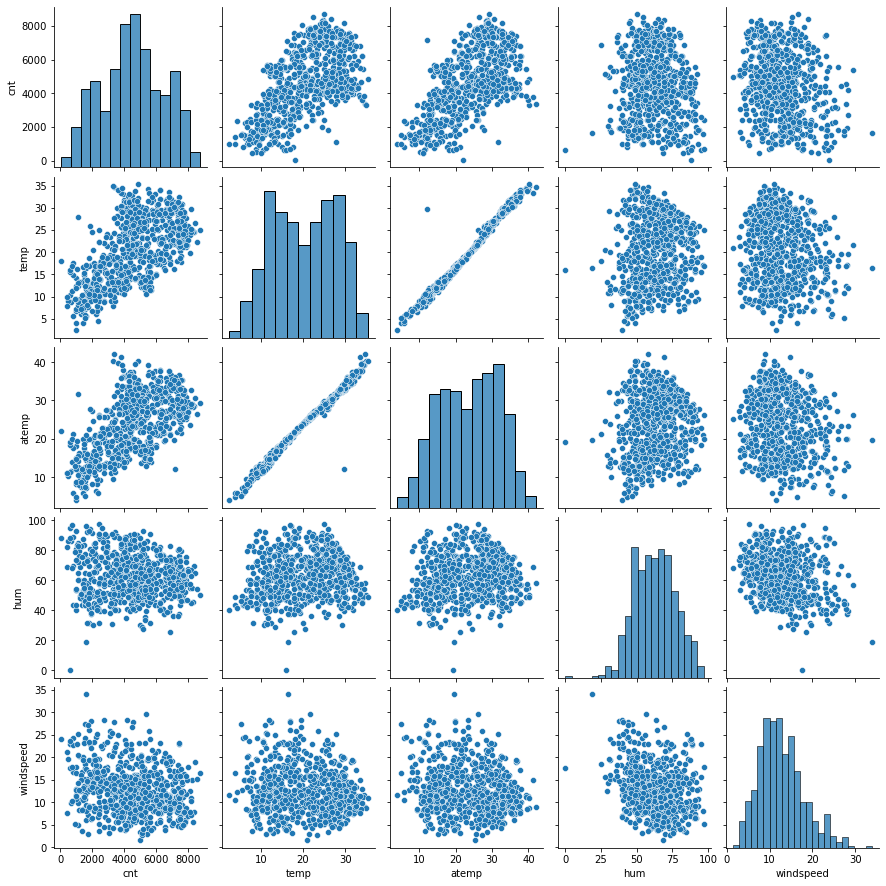

In [191]:
#Analysing the numerical colunmns
sns.pairplot(data=df,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

Analysing the categorical columns

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

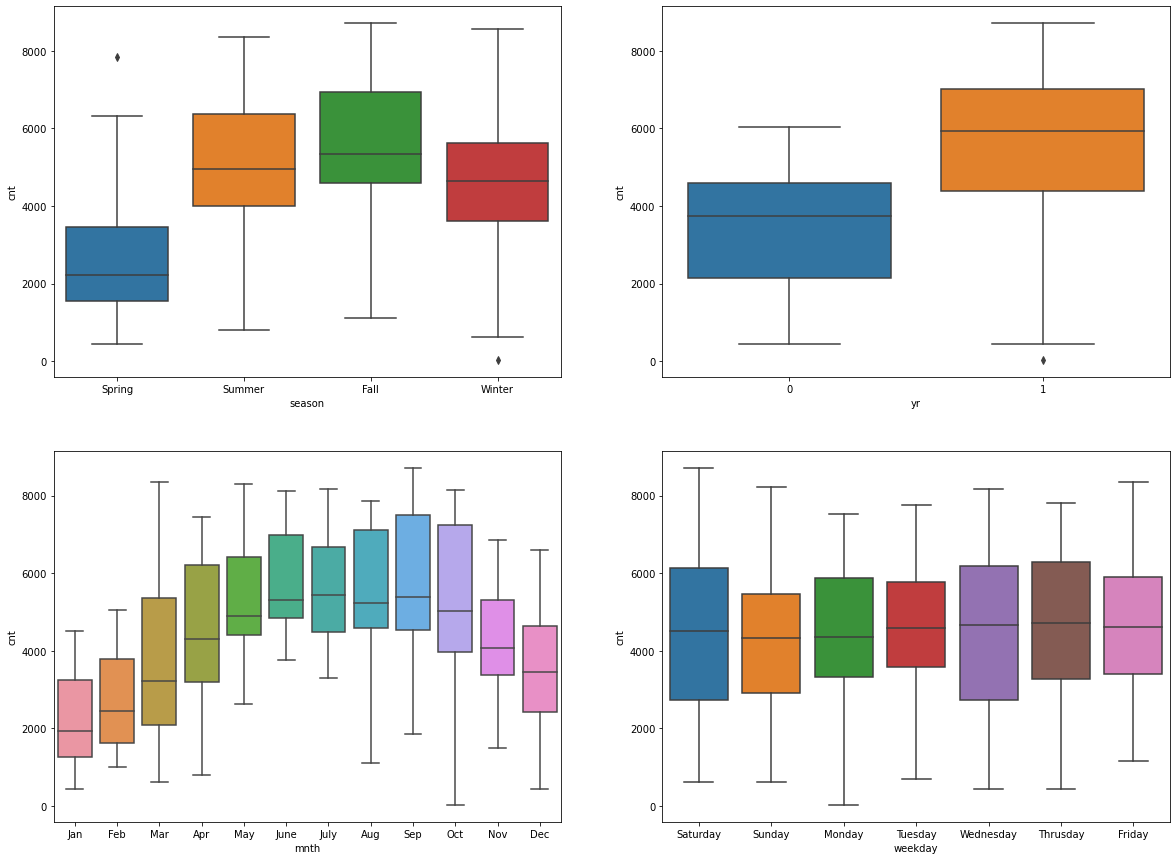

In [192]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
sns.boxplot(x = 'season',y='cnt',data=df)
plt.subplot(2,2,2)
sns.boxplot(x = 'yr',y='cnt',data=df)
plt.subplot(2,2,3)
sns.boxplot(x = 'mnth',y='cnt',data=df)
plt.subplot(2,2,4)
sns.boxplot(x = 'weekday',y='cnt',data=df)


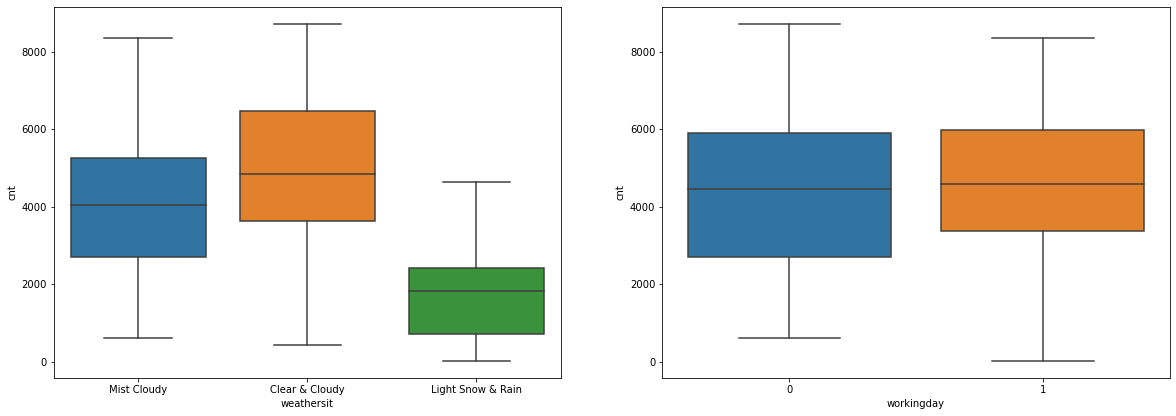

In [193]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
sns.boxplot(x = 'weathersit',y='cnt',data=df)
plt.subplot(2,2,2)
sns.boxplot(x = 'workingday',y='cnt',data=df)
plt.show()

#### From the above plot  :
##### 1) The demand is high in the summer and Fall season
##### 2) From the month of feb to oct there is higher demand after oct the demand falls back
##### 3) the bike shares increased in 2019 where the maixmum share of 2018 is the median of 2019
##### 4) High sales in clear and cloudy whereas there is no sale in Heavy rain weather


### Data Preparation 

In [194]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear & Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear & Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear & Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [195]:
#We can create dummy variables for the categorical columns such as season,mnth,weekday,weathersit
#since yr and holiday are categorised as 0 and 1 we can ignore that 
SeasonDM = pd.get_dummies(df['season'],drop_first=True)
MonthsDM = pd.get_dummies(df['mnth'],drop_first=True)
WeekdayDM = pd.get_dummies(df['weekday'],drop_first=True)
WeathersitDM = pd.get_dummies(df['weathersit'],drop_first=True)

In [196]:
SeasonDM.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [197]:
MonthsDM.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [198]:
WeekdayDM.head()

,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [199]:
WeathersitDM.head()

,Light Snow & Rain,Mist Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [200]:
#Now we concat all the dummy varibales to the data frame
bike_data = pd.concat([df,SeasonDM,MonthsDM,WeekdayDM,WeathersitDM],axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow & Rain,Mist Cloudy
0,Spring,0,Jan,0,Saturday,0,Mist Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sunday,0,Mist Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Monday,1,Clear & Cloudy,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tuesday,1,Clear & Cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wednesday,1,Clear & Cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [201]:
#we can drop the variables which we used to create dummy since we already have the data of it
bike_data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow & Rain,Mist Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [202]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   Spring             730 non-null    uint8  
 9   Summer             730 non-null    uint8  
 10  Winter             730 non-null    uint8  
 11  Aug                730 non-null    uint8  
 12  Dec                730 non-null    uint8  
 13  Feb                730 non-null    uint8  
 14  Jan                730 non-null    uint8  
 15  July               730 non-null    uint8  
 16  June               730 non

### Training and Test Set Preparation 

In [203]:
#import train_test_split from sklearn library
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [204]:
#splitting the train data and test data with size 0.7
np.random.seed(0)
df_train,df_test = train_test_split(bike_data,train_size = 0.7,random_state = 101)

In [205]:
df_train.shape

(510, 30)

In [206]:
df_test.shape 

(220, 30)

In [207]:
#Among 730 entries train data contians 510 rows and test data contains 220
bike_data.shape

(730, 30)

##### Scaling Data

In [208]:
#we have two methods to scale standardisation and min max scaling we can use min max scaling here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [209]:
#Delcare the varibles to scale
NumVars = ['temp','atemp','hum','windspeed','cnt']
df_train[NumVars] = scaler.fit_transform(df_train[NumVars])

In [210]:
#Check the training data head
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow & Rain,Mist Cloudy
117,0,0,1,0.695756,0.656133,0.655484,0.615407,0.472987,0,1,...,0,0,0,0,0,1,0,0,0,1
712,1,0,1,0.277292,0.282377,0.581470,0.224374,0.654987,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,1,0.343747,0.316347,0.334397,0.588452,0.247510,1,0,...,0,0,0,0,0,0,0,1,0,0
72,0,0,1,0.331557,0.332005,0.394939,0.236118,0.237197,1,0,...,0,0,1,0,0,0,0,0,0,0
124,0,0,1,0.498465,0.476286,0.327476,0.562804,0.516934,0,1,...,0,0,0,0,0,1,0,0,0,0


### Training the model

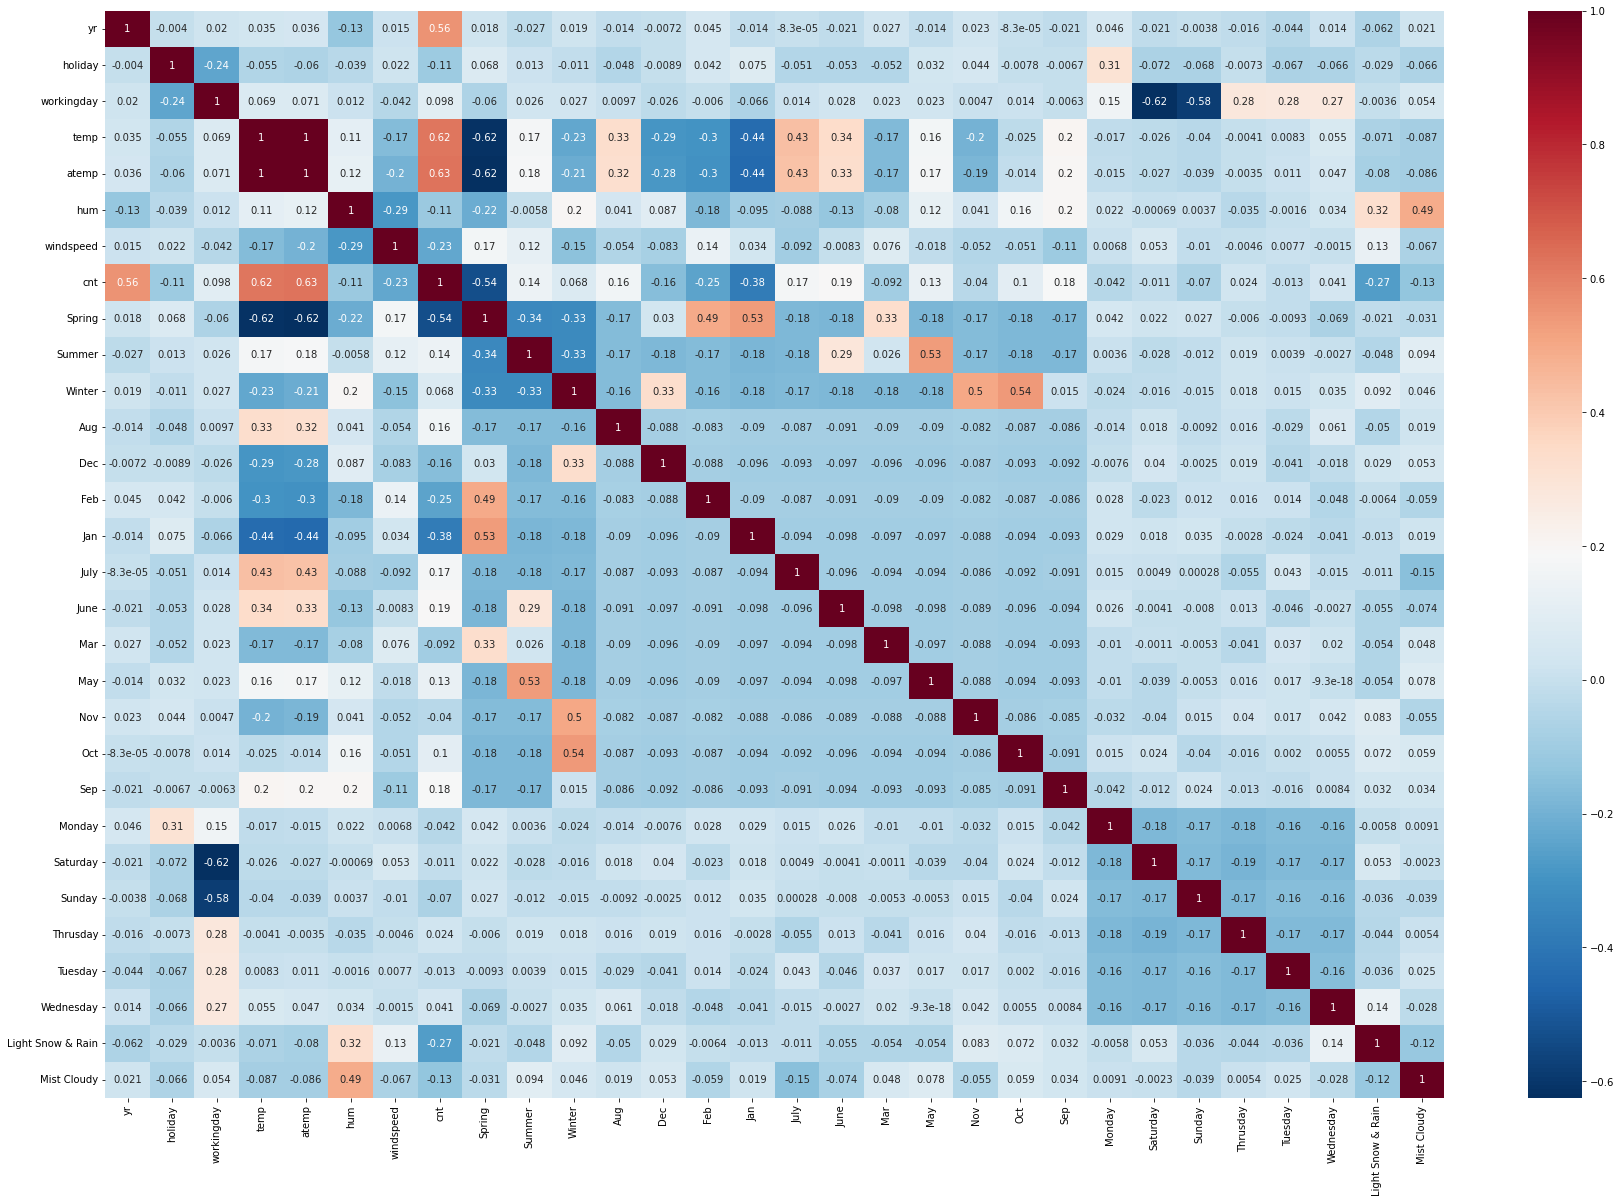

In [211]:
#Checking the cooreleation using heat map
plt.figure(figsize = (30,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu_r")
plt.show()

From above chart it clearly states that atemp and temp are highly corrleated.we can use any of them for 
prediction but we dont want to drop now.we can do it as per the regression model flow

In [213]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow & Rain,Mist Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.027451,0.676471,0.543404,0.519449,0.560532,0.342680,0.525567,0.252941,0.252941,...,0.084314,0.082353,0.145098,0.156863,0.139216,0.158824,0.137255,0.133333,0.029412,0.327451
std,0.500352,0.163554,0.468282,0.228785,0.214049,0.180086,0.162713,0.227303,0.435124,0.435124,...,0.278131,0.275172,0.352545,0.364028,0.346511,0.365870,0.344454,0.340268,0.169124,0.469744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.345304,0.340364,0.427182,0.225964,0.377124,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529616,0.517727,0.564962,0.318604,0.526661,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.742483,0.695494,0.691027,0.434629,0.692693,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
#Creare X train and Y Train data
y_train = df_train.pop('cnt')
X_train = df_train

In [215]:
y_train.head()

117    0.472987
712    0.654987
60     0.247510
72     0.237197
124    0.516934
Name: cnt, dtype: float64

In [216]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow & Rain,Mist Cloudy
117,0,0,1,0.695756,0.656133,0.655484,0.615407,0,1,0,...,0,0,0,0,0,1,0,0,0,1
712,1,0,1,0.277292,0.282377,0.581470,0.224374,0,0,1,...,0,0,0,0,0,0,0,0,0,0
60,0,0,1,0.343747,0.316347,0.334397,0.588452,1,0,0,...,0,0,0,0,0,0,0,1,0,0
72,0,0,1,0.331557,0.332005,0.394939,0.236118,1,0,0,...,0,0,1,0,0,0,0,0,0,0
124,0,0,1,0.498465,0.476286,0.327476,0.562804,0,1,0,...,0,0,0,0,0,1,0,0,0,0


##### Recursive Feature Elimination

In [217]:
#We can do Recursive Feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [219]:
#Do RFE with the X_train and Y_train
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [220]:
#True variables are the 15 variables seleceted in RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 8),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 6),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 3),
 ('Sunday', False, 11),
 ('Thrusday', False, 15),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 ('Light Snow & Rain', True, 1),
 ('Mist Cloudy', True, 1)]

In [222]:
#Extract the selected Columns
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Feb', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow & Rain', 'Mist Cloudy'],
      dtype='object')

In [223]:
#Splitting the rejected columns
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'Summer', 'Aug', 'June', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [224]:
#RFE Selected Variable
X_train_rfe = X_train[selected_columns]
X_train_rfe

,yr,holiday,atemp,hum,windspeed,Spring,Winter,Dec,Feb,Jan,July,Nov,Sep,Light Snow & Rain,Mist Cloudy
117,0,0,0.656133,0.655484,0.615407,0,0,0,0,0,0,0,0,0,1
712,1,0,0.282377,0.581470,0.224374,0,1,1,0,0,0,0,0,0,0
60,0,0,0.316347,0.334397,0.588452,1,0,0,0,0,0,0,0,0,0
72,0,0,0.332005,0.394939,0.236118,1,0,0,0,0,0,0,0,0,0
124,0,0,0.476286,0.327476,0.562804,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0.434828,0.530351,0.385896,1,0,0,0,0,0,0,0,0,0
599,1,0,0.732369,0.572417,0.128237,0,0,0,0,0,0,0,0,0,0
575,1,0,0.795348,0.614483,0.270528,0,0,0,0,0,1,0,0,0,0
337,0,0,0.354451,0.751330,0.126923,0,1,1,0,0,0,0,0,0,0


In [225]:
#import VIF Calculation 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [226]:
#Function to do VIF Calcualtion 
def doVIFCalculation(X_train_rfe_p):
    vif = pd.DataFrame()
    X = X_train_rfe_p
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model Building

###### Model 1

In [227]:
X_train_model_1 = sm.add_constant(X_train_rfe)
lrm_1 = sm.OLS(y_train,X_train_model_1).fit()
print(lrm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.26e-182
Time:                        20:40:02   Log-Likelihood:                 492.29
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     494   BIC:                            -884.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3901      0.03

The p values are below the significance level 0.05 we can check the VIF

In [228]:
doVIFCalculation(X_train_rfe)

,Features,VIF
3,hum,18.75
2,atemp,14.44
4,windspeed,4.55
5,Spring,4.17
6,Winter,2.73
14,Mist Cloudy,2.50
9,Jan,2.25
0,yr,2.13
8,Feb,2.01
11,Nov,1.72


Here the hum VIF value seems to be very high.Even though atemp is also high there is a chance it will be low if we remove hum

In [229]:
#Drop the hum value
X_train_rfe=X_train_rfe.drop(["hum"], axis = 1)

###### Model 2 

In [230]:
X_train_model_2 = sm.add_constant(X_train_rfe)
lrm_2 = sm.OLS(y_train,X_train_model_2).fit()
print(lrm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.15e-179
Time:                        20:42:33   Log-Likelihood:                 481.23
No. Observations:                 510   AIC:                            -932.5
Df Residuals:                     495   BIC:                            -869.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3193      0.03

The P values are below the significance level

In [232]:
doVIFCalculation(X_train_rfe)

,Features,VIF
2,atemp,5.04
3,windspeed,4.54
4,Spring,3.83
5,Winter,2.45
8,Jan,2.18
0,yr,2.09
7,Feb,2.01
10,Nov,1.68
6,Dec,1.56
13,Mist Cloudy,1.51


The atemp of VIF is greater than 5 but not a high value to drop since its a important value.we can keep and check the corr of all the varibles and remove the correleation of atemp which may low the aTemp VIF

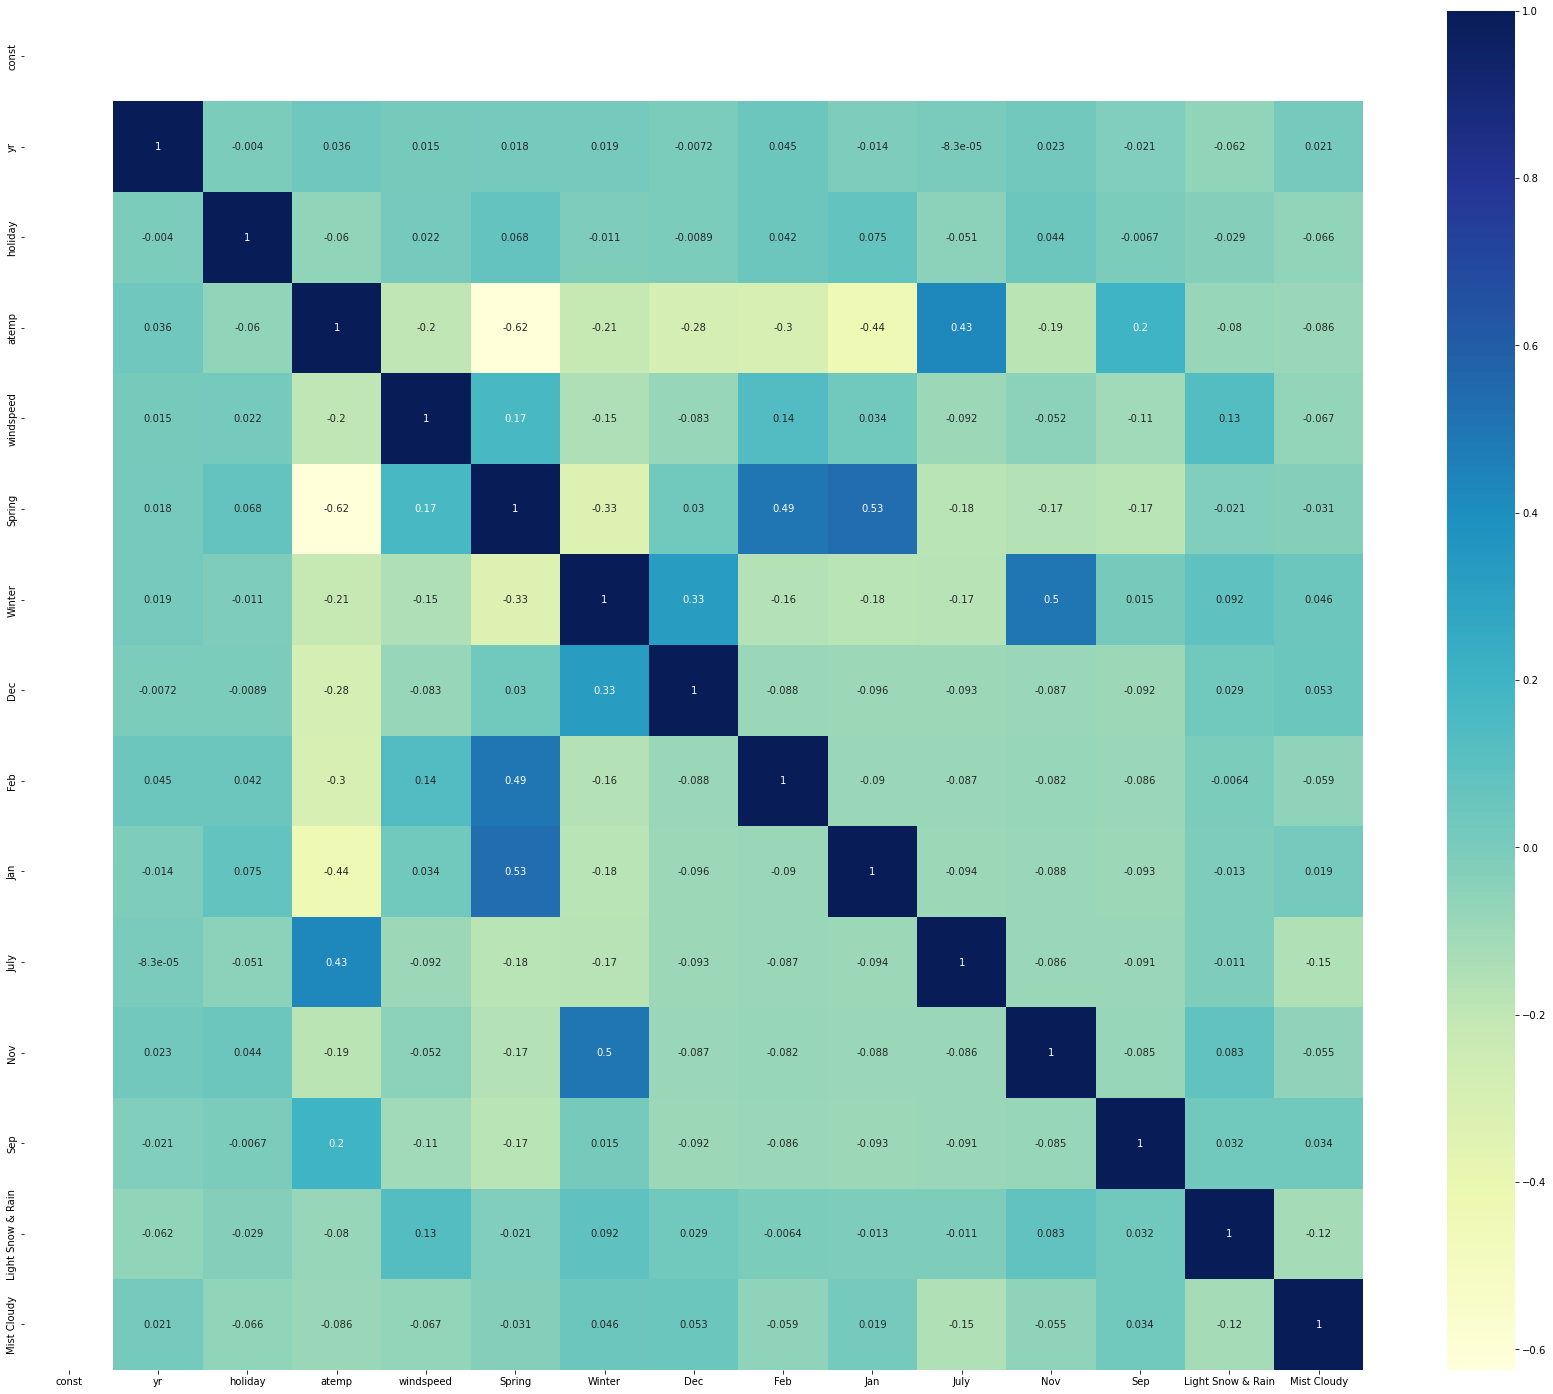

In [233]:
#Checking the corr using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(X_train_model_2.corr(), annot = True, cmap="YlGnBu")
plt.show()


From the above chart we can see the spring and jan are highly correleated.we can remove one by one and we can check

In [234]:
#atemp is high correleated with spring we can drop that

X_train_rfe=X_train_rfe.drop(["Spring"], axis = 1)

##### Model 3

In [235]:
X_train_model_3 = sm.add_constant(X_train_rfe)
lrm_3 = sm.OLS(y_train,X_train_model_3).fit()
print(lrm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.85e-174
Time:                        20:48:16   Log-Likelihood:                 466.83
No. Observations:                 510   AIC:                            -905.7
Df Residuals:                     496   BIC:                            -846.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2442      0.02

The P values remains zero and removing the Spring doesnt affect the R Square value much

In [238]:
doVIFCalculation(X_train_rfe)

,Features,VIF
2,atemp,5.00
3,windspeed,4.20
4,Winter,2.26
0,yr,2.07
9,Nov,1.67
12,Mist Cloudy,1.51
5,Dec,1.41
8,July,1.41
6,Feb,1.22
7,Jan,1.22


In [239]:
#We can remove Jan as well to check the VIF value of atemp
X_train_rfe=X_train_rfe.drop(["Jan"], axis = 1)

##### Model 4

In [240]:
X_train_model_4 = sm.add_constant(X_train_rfe)
lrm_4 = sm.OLS(y_train,X_train_model_4).fit()
print(lrm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     170.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.58e-167
Time:                        20:51:27   Log-Likelihood:                 448.85
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     497   BIC:                            -816.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1420      0.02

The P values are less than significance value

In [241]:
doVIFCalculation(X_train_rfe)

,Features,VIF
2,atemp,4.72
3,windspeed,3.76
4,Winter,2.25
0,yr,2.04
8,Nov,1.66
11,Mist Cloudy,1.49
7,July,1.41
5,Dec,1.40
9,Sep,1.21
6,Feb,1.18


All the VIF values are below 5 

Since all the p values are less than 0.5 and The VIF values are less than 5

F-Statistic is 170.6 which is greater than 1
Prob (F-Statistic) is almost zero

#### Based on th above conditions we can Consider the Model 4

## Residual Analysis

In [249]:
#Create y train pred from the trained model
y_train_pred = lrm_4.predict(X_train_model_4)

Text(0.5, 0, 'Errors')

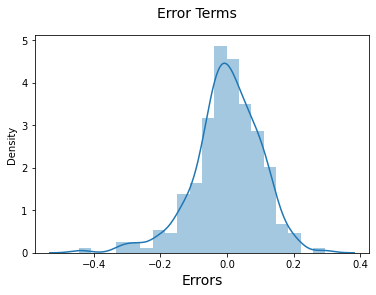

In [250]:
# Histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 14) 
plt.xlabel('Errors', fontsize = 14)

##### From the above chart we can see that the error terms are normally distributed

##### Multicolinearity

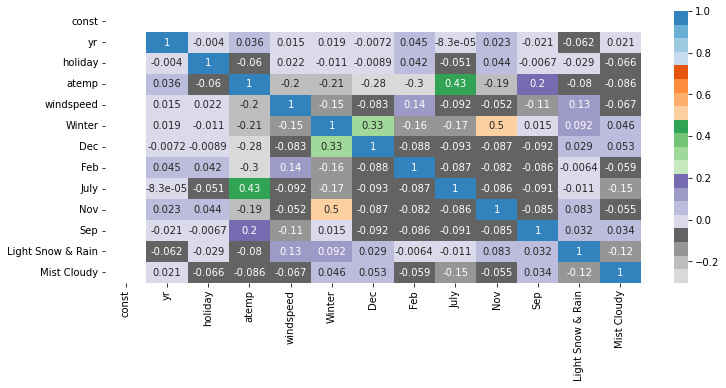

In [255]:
#checking the multicolinearity for the trained model
plt.figure(figsize=(12,5))
sns.heatmap(X_train_model_4.corr(),annot = True, cmap="tab20c_r")
plt.show()

From the above chart we can see there is no multicolinearity

### Making Predictions

In [256]:
#Scaling the test Dataset
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [257]:
#create X_test and Y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [258]:
#Drop the constant variable from the trained model
X_train_new = X_train_model_4.drop('const',axis=1)
# X_test variables dropped and Created X_test_new
X_test_new = X_test[X_train_new.columns]


In [259]:

# constant varible added
X_test_new = sm.add_constant(X_test_new)

In [260]:
#Create y Pred from the X_test_NEW
y_pred = lrm_4.predict(X_test_new)


In [261]:
#Print the r2 value for the test data
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred)
print(r2)

0.8124324048819112


#### Model Evaluation

Text(0, 0.5, 'y_pred')

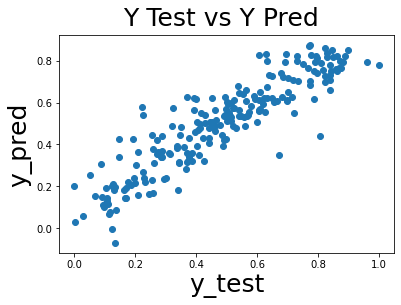

In [262]:
# Y_test and Y_pred plotted
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Y Test vs Y Pred', fontsize = 25) 
plt.xlabel('y_test', fontsize = 25)
plt.ylabel('y_pred', fontsize = 25) 

In [263]:
round(lrm_4.params,4)

const                0.1420
yr                   0.2388
holiday             -0.1158
atemp                0.6184
windspeed           -0.1074
Winter               0.1213
Dec                 -0.0581
Feb                 -0.0573
July                -0.0711
Nov                 -0.0560
Sep                  0.0463
Light Snow & Rain   -0.2892
Mist Cloudy         -0.0762
dtype: float64

##### Best Fitted Line
#### cnt = 0.1420 + 0.2388 * times year - 0.1158 * holiday + 0.6184 * atemp - 0.1074 * windspeed + 0.1213 * winter-0.0581 * Dec-0.0573 * Feb-0.0711 * July-0.0560 * Nov + 0.0463 * Sep - 0.2892 * Light Snow & Rain-0.0762 * Mist Cloudy

##### Adjusted R2 Calculation

In [265]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7838


###### Train Data set R^2 is : 0.805 (80.5%)
###### Train Data Adj. R-squared: 0.800 (80%)
###### Test Data set R^2 is : 0.812 (81.2%)
###### Test Data Adj. R-squared: 0.783 (78.3%)


#### Demand for bike sharing are based on the following varibles

Year, Holiday, aTemp, Windspeed, Winter, Dec, Feb, July, Nov, Sep, Light Snow & Rain, Mist Cloudy

##### Obeservation : 
    The Demand is high in the month of Feb, July , Nov , Sep , Dec
    The Demand is high for increasing Year
    Misty Cloudy and Light Snow & Light Rain the demand is better
    Winter season the demand is upper